In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import numpy as np
from scipy import stats as st

games = pd.read_csv('E:\\datasets\\games.csv')

In [108]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Preparación de datos

Cambiando los nombres de las columnas a minusculas

In [109]:
games.columns = games.columns.str.lower()

Verificando si hay filas duplicadas

In [110]:
games.duplicated().sum()

np.int64(0)

Verificando si hay valores ausentes

In [111]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [112]:
games.stb.missing()

,missing,total,percent
critic_score,8578,16715,51.319174
rating,6766,16715,40.478612
user_score,6701,16715,40.089740
year_of_release,269,16715,1.609333
name,2,16715,0.011965
genre,2,16715,0.011965
platform,0,16715,0.000000
jp_sales,0,16715,0.000000
eu_sales,0,16715,0.000000
na_sales,0,16715,0.000000


Se convierten los datos de la columna 'year_of_release' a entero y se rellenan los valores ausentes a 0 dado que no es un dato que se utilice para cálculos.

In [113]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

Se rellenan los valores ausentes de las columnas 'name' y 'genre' con la palabra 'Unknown'. Se usa esta palabra porque no podemos asumir el nombre o género y evitamos que se sesguen los datos hacia los más frecuentes. Además es más legible para datos categóricos.

In [114]:
games['name'] = games['name'].fillna('Unknown')

In [115]:
games['genre'] = games['genre'].fillna('Unknown')

Se revisan si los valores de critic_score y user_score tienen valores no numéricos

In [116]:
games['critic_score'].value_counts().sort_index()

critic_score
13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    37
95.0    16
96.0    18
97.0    11
98.0     4
Name: count, Length: 82, dtype: int64

In [117]:
games['user_score'].value_counts().sort_index()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: count, Length: 96, dtype: int64

In [118]:
(games['user_score'] == 'tbd').sum()

np.int64(2424)

In [119]:
games.loc[games['user_score'] == 'tbd', 'user_score']

119      tbd
301      tbd
520      tbd
645      tbd
657      tbd
        ... 
16695    tbd
16697    tbd
16698    tbd
16704    tbd
16706    tbd
Name: user_score, Length: 2424, dtype: object

Se convierten los valores 'tbd' del user_score a tipo Nan. Usar este tipo de datos es más común para datos numéricos.

In [120]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [121]:
games['user_score'].value_counts().sort_index()

user_score
0       1
0.2     2
0.3     2
0.5     2
0.6     2
       ..
9.3    31
9.4    11
9.5     6
9.6     2
9.7     1
Name: count, Length: 95, dtype: int64

Se covierten los valores de user_score a tipo flotante.

In [122]:
games['user_score'] = games['user_score'].astype(float)

Se suman el total de ventas de cada región por cada juego y se coloca el valor en una columna separada

In [123]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Información del data frame después de haber hecho los cambios

In [124]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Análisis de datos

In [125]:
games.nlargest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


- ### Juegos lanzados cada año

In [126]:
games_year = games.groupby('year_of_release')['name'].count().sort_index().reset_index()

games_year.columns = ['year_of_release', 'total_games']

In [127]:
games_year = games_year.query('year_of_release != 0')

In [128]:
games_year

,year_of_release,total_games
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


<Axes: xlabel='año de lanzamiento', ylabel='número de juegos'>

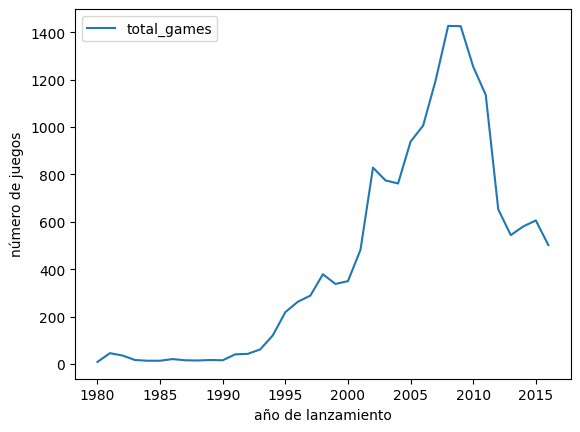

In [129]:
games_year.plot(kind='line', x='year_of_release', y='total_games', xlabel='año de lanzamiento', ylabel = 'número de juegos')

Las ventas de juegos empezaron a crecer en la primera mitad de loas años 90's hasta llegar a su máximo en los años 2008-2009.

- ### Ventas por plataforma

In [130]:
sales_platform = games.groupby('platform')['total_sales'].sum().sort_values().reset_index()

In [131]:
sales_platform['z_score'] = (sales_platform['total_sales'] - sales_platform['total_sales'].mean())/sales_platform['total_sales'].std()

In [132]:
sales_platform['color'] = ['red' if z_score < 0 else 'green' for z_score in sales_platform['z_score']]

In [133]:
sales_platform.sort_values(by='total_sales', ascending=False).head(6)

,platform,total_sales,z_score,color
30,PS2,1255.77,2.780807,green
29,X360,971.42,1.964085,green
28,PS3,939.65,1.872834,green
27,Wii,907.51,1.780520,green
26,DS,806.12,1.489304,green
25,PS,730.86,1.273139,green


Text(0.5, 1.0, 'Rentabilidad por plataforma')

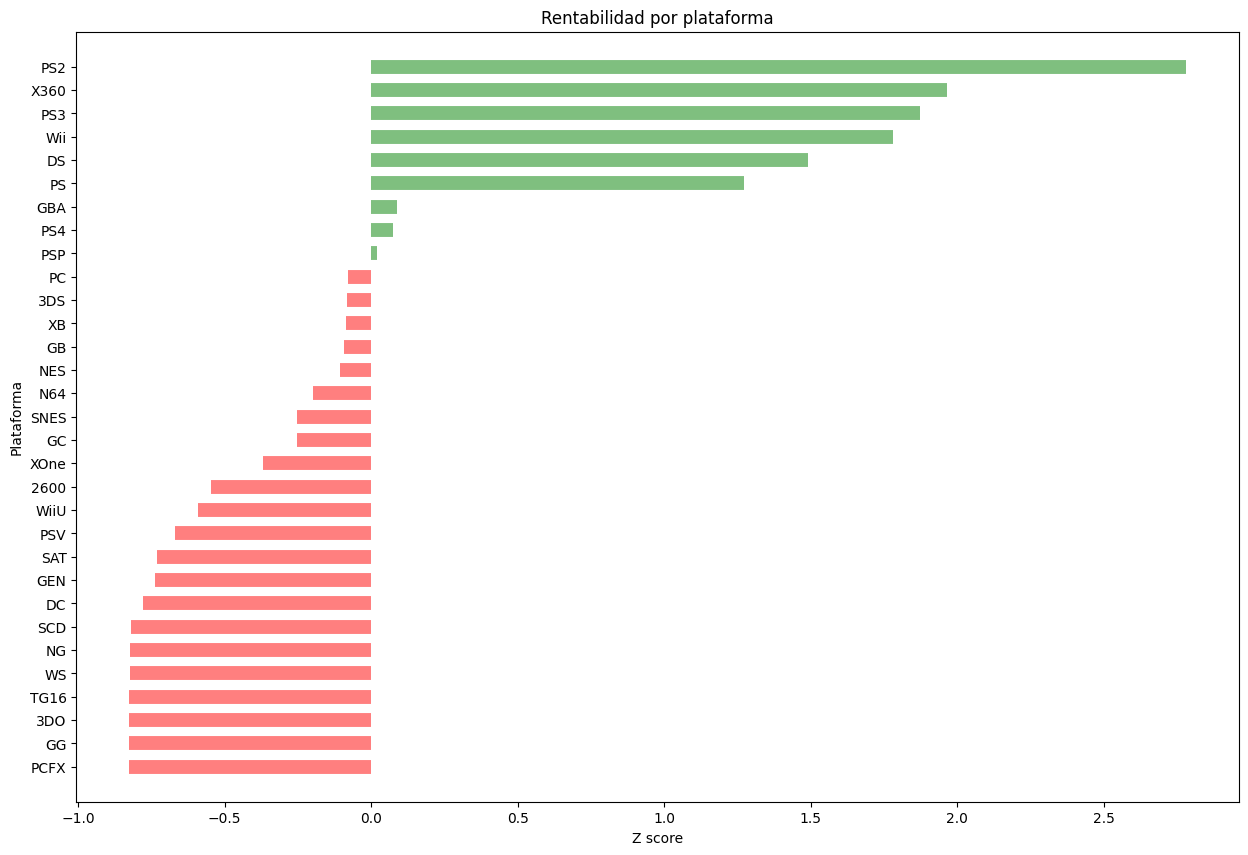

In [134]:
plt.figure(figsize=(15,10))
plt.hlines(
    y=sales_platform.platform,
    xmax=sales_platform.z_score,
    xmin=0,
    color=sales_platform.color,
    linewidth=10,
    alpha=0.5
)

plt.ylabel('Plataforma')
plt.xlabel('Z score')
plt.title('Rentabilidad por plataforma')

- ### Ventas por plataforma y año

In [135]:
sales_year_platform = games.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum').sort_values(by=['year_of_release', 'platform'], ascending=False).reset_index()

In [136]:
sales_year_platform = sales_year_platform.query('year_of_release != 0')

In [137]:
top_sales_year_platform = sales_year_platform.query('platform in ["PS2","X360", "Wii", "PS3", "DS", "PS"]')

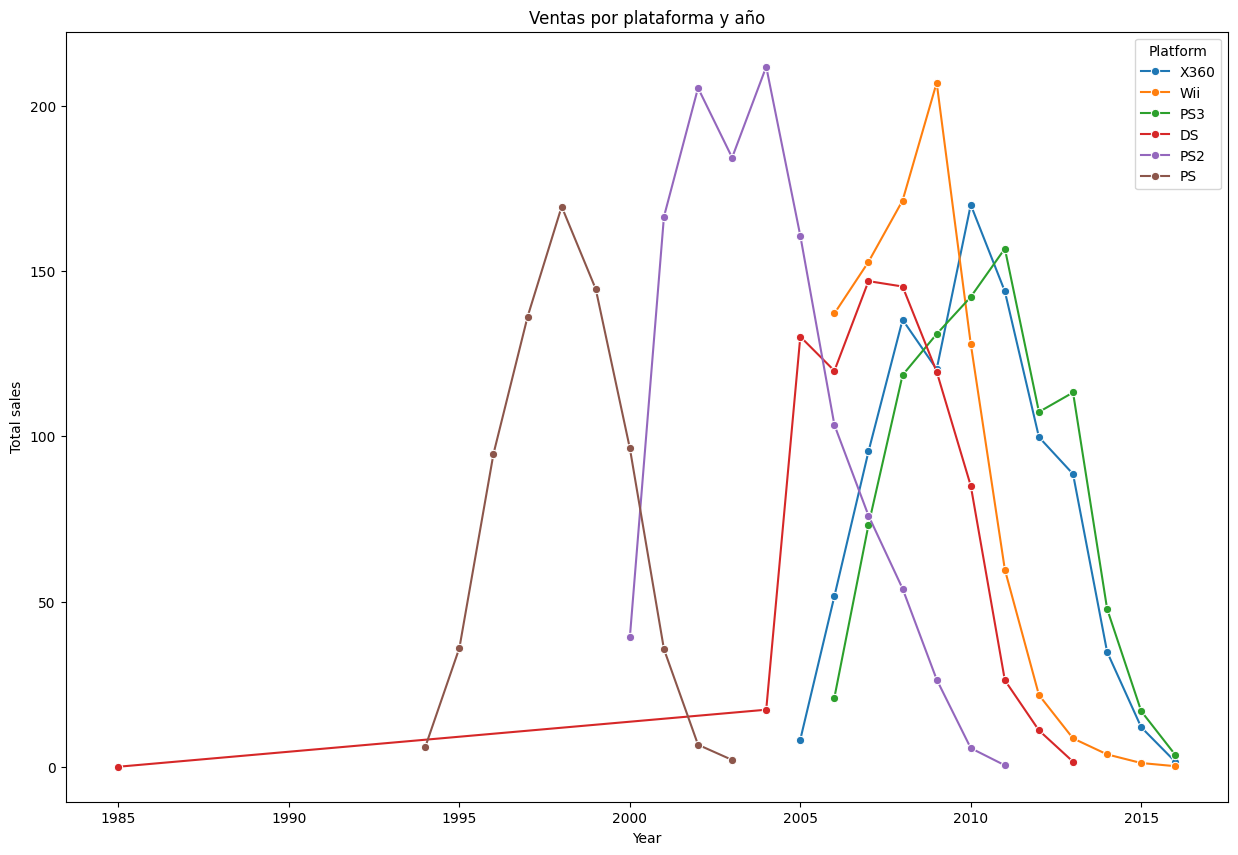

In [138]:
plt.figure(figsize=(15,10))
sns.lineplot(data=top_sales_year_platform, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.title('Ventas por plataforma y año')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(title='Platform')

- ### Ventas de juegos para las consolas de Nintendo

In [139]:
nintendo_sales_year = sales_year_platform.query('platform in ["NES","SNES", "N64", "GC", "Wii", "WiiU"]')

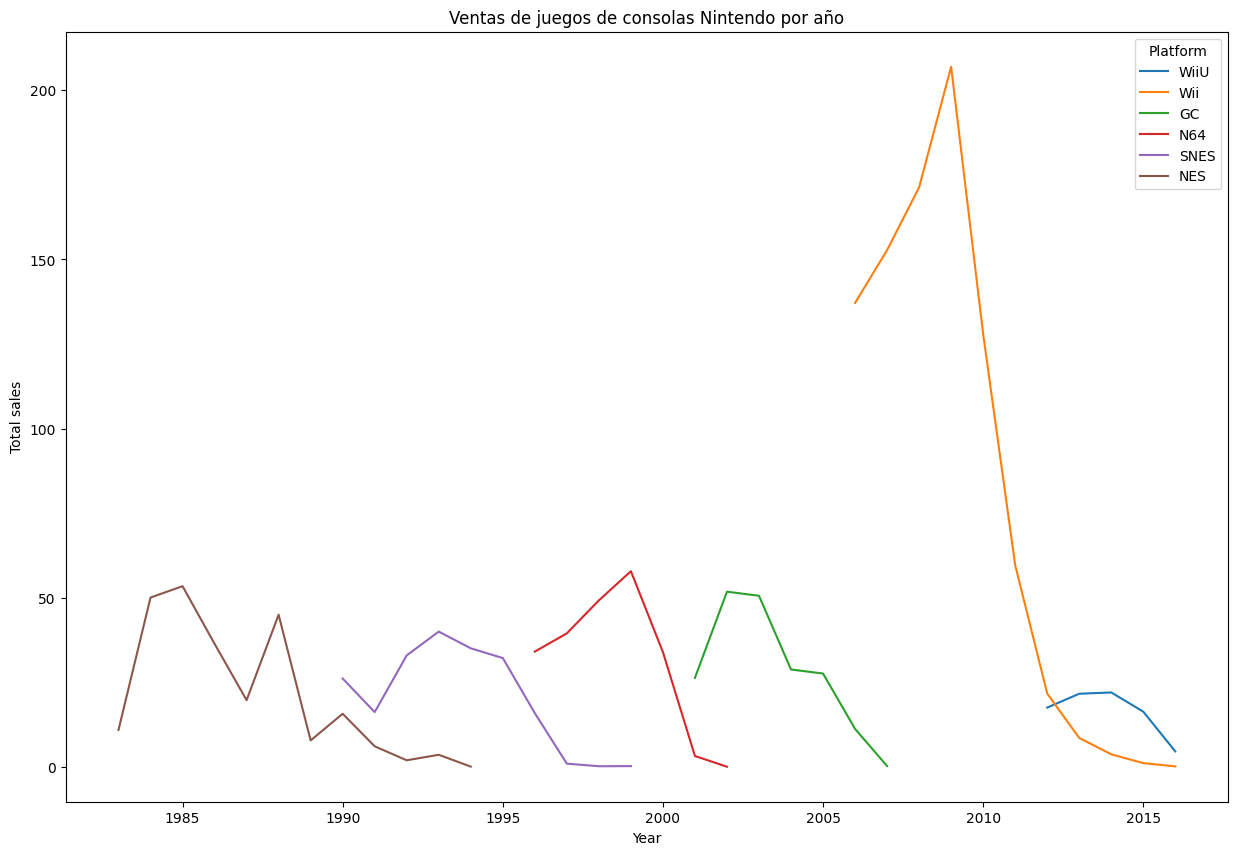

In [140]:
plt.figure(figsize=(15,10))
sns.lineplot(data=nintendo_sales_year, x='year_of_release', y='total_sales', hue='platform')

plt.title('Ventas de juegos de consolas Nintendo por año')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(title='Platform')

- ### Ventas de juegos para las consolas de Sony

In [141]:
sony_sales_year = sales_year_platform.query('platform in ["PS","PS2", "PS3", "PS4"]')

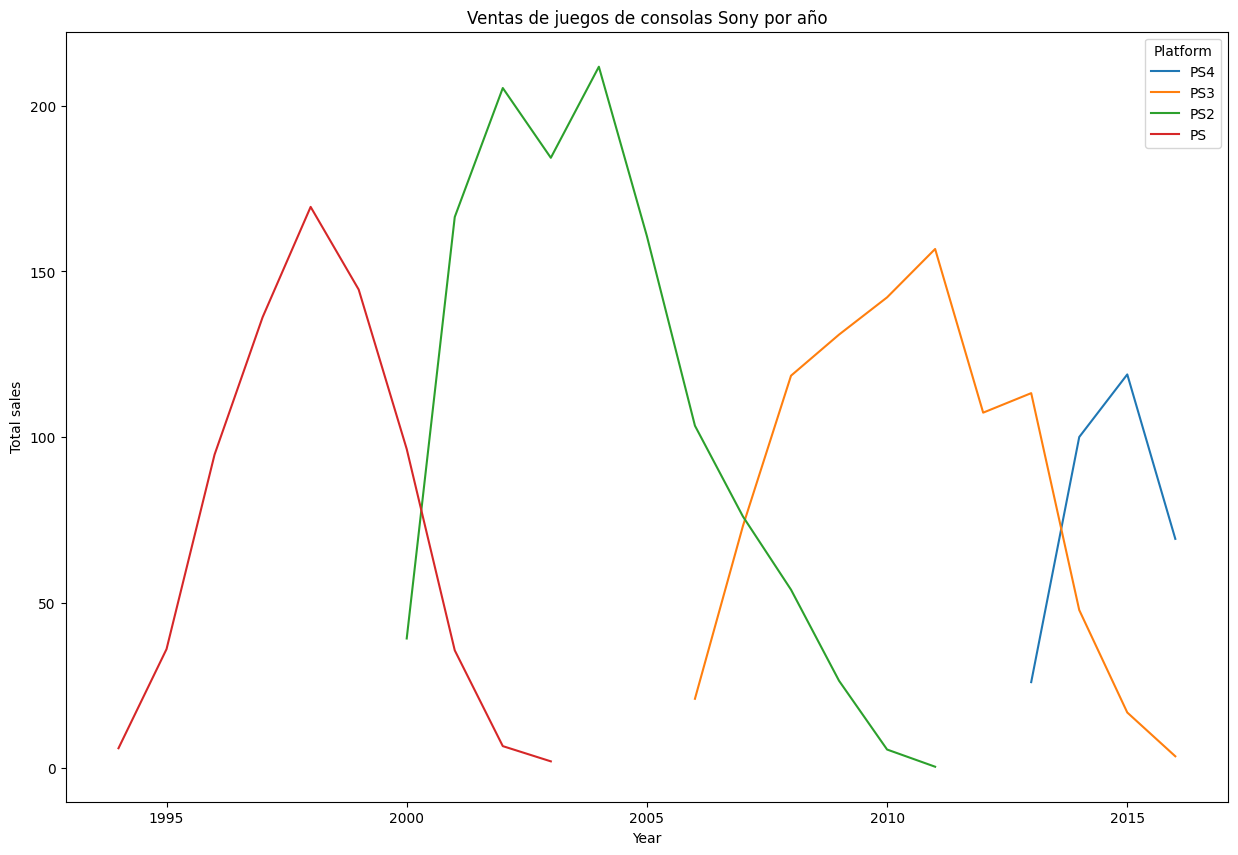

In [142]:
plt.figure(figsize=(15,10))
sns.lineplot(data=sony_sales_year, x='year_of_release', y='total_sales', hue='platform')

plt.title('Ventas de juegos de consolas Sony por año')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(title='Platform')

Basandonos en las ventas de juegos por plataforma de la misma compañía (Sony, Nintendo), cada 6 años aproximadamente aparece un nueva consola.

- ### Periodo 2011 - 2016

In [143]:
period_sales = sales_year_platform.query('year_of_release in [2011, 2012, 2013, 2014, 2015, 2016]')

In [144]:
period_sales_selected_platforms = period_sales.query('platform in ["XOne", "PS4", "WiiU", "PC", "3DS"]')

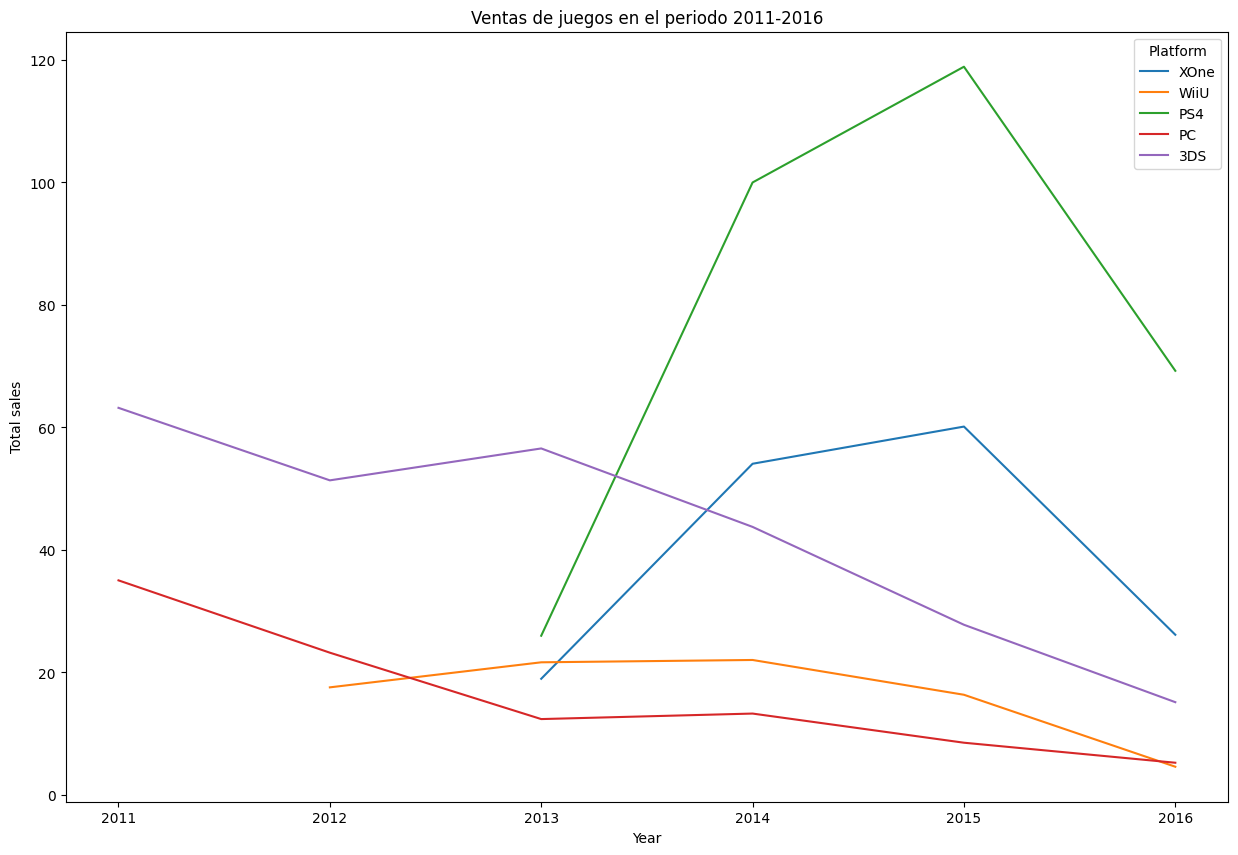

In [145]:
plt.figure(figsize=(15,10))
sns.lineplot(data=period_sales_selected_platforms, x='year_of_release', y='total_sales', hue='platform')

plt.title('Ventas de juegos en el periodo 2011-2016')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(title='Platform')

De acuerdo a la útlima gráfica, las plataformas líderes de venta de juegos en el período 2011-2016 son PS4 y Xbox One.

- ### Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

In [146]:
selected_platform_sales = games.query(('platform in ["XOne", "PS4", "WiiU", "PC", "3DS"]'))

<Axes: xlabel='platform', ylabel='total_sales'>

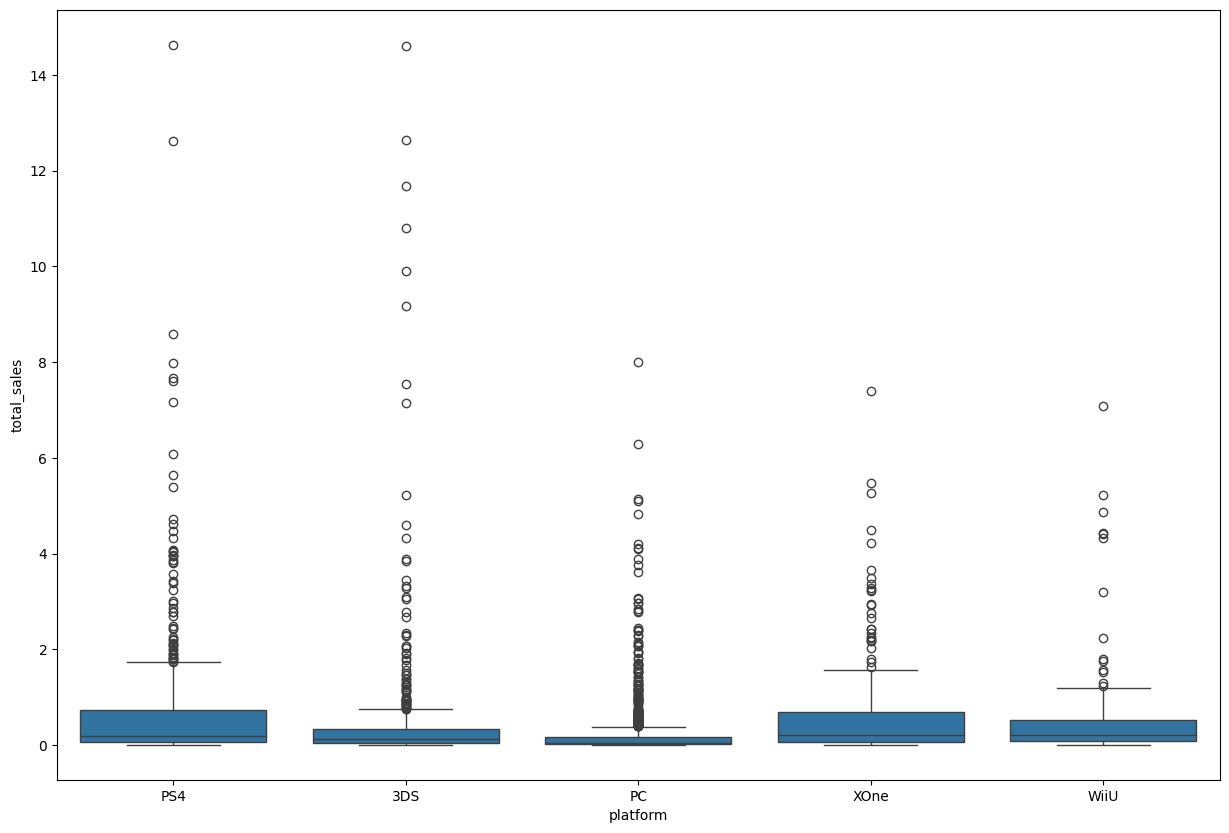

In [147]:
plt.figure(figsize=(15,10))
sns.boxplot(data=selected_platform_sales, x='platform', y='total_sales')

In [148]:
_ps4 = selected_platform_sales.query('platform == "PS4"')

_ps4['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [149]:
_3ds = selected_platform_sales.query('platform == "3DS"')

_3ds['total_sales'].describe()

count    520.000000
mean       0.498077
std        1.430876
min        0.010000
25%        0.050000
50%        0.120000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

In [150]:
_pc = selected_platform_sales.query('platform == "PC"')

_pc['total_sales'].describe()

count    974.000000
mean       0.266448
std        0.675577
min        0.010000
25%        0.020000
50%        0.050000
75%        0.170000
max        8.010000
Name: total_sales, dtype: float64

In [151]:
_xone = selected_platform_sales.query('platform == "XOne"')

_xone['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [152]:
_wiiu = selected_platform_sales.query('platform == "WiiU"')

_wiiu['total_sales'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

- ### Reseñas de usuarios para el PS4

In [153]:
_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [154]:
_ps4_scores = _ps4[['critic_score', 'user_score', 'total_sales']]

In [155]:
_ps4_scores['critic_score'] = _ps4_scores['critic_score'] / 10

C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_452\581098698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ps4_scores['critic_score'] = _ps4_scores['critic_score'] / 10


In [156]:
_ps4_scores.corr(method='pearson')

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [157]:
_ps4_scores

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,9.7,8.3,12.62
77,8.2,4.3,8.58
87,NaN,NaN,7.98
92,8.3,5.7,7.66
...,...,...,...
16500,6.9,7.5,0.01
16503,NaN,NaN,0.01
16526,6.1,7.9,0.01
16530,5.1,5.5,0.01


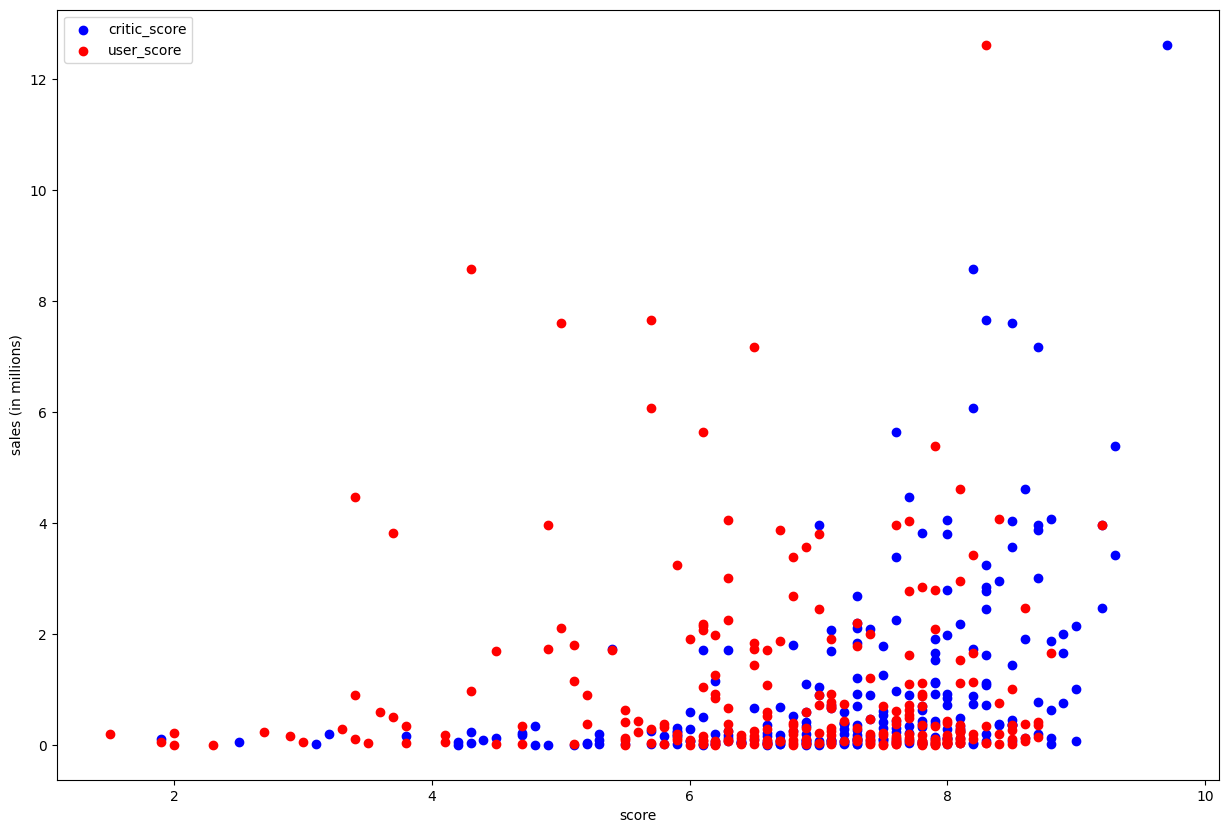

In [158]:
plt.figure(figsize=(15,10))
plt.scatter(_ps4_scores['critic_score'], _ps4_scores['total_sales'], label='Critic scores', color='blue')
plt.scatter(_ps4_scores['user_score'], _ps4_scores['total_sales'], label='User scores', color='red')

plt.xlabel('score')
plt.ylabel('sales (in millions)')
plt.legend(['critic_score', 'user_score'])

plt.show()

Existe una correlacion positiva entre las reseñas de las críticas con el total de ventas. Y existe una correlación negativa entre las reseñas de los usuarios y las ventas totales.

- ### Juegos por género

In [159]:
sales_genre = games.groupby('genre')['total_sales'].sum().sort_index().reset_index()

In [160]:
sales_genre = sales_genre.query('genre != "Unknown"')

In [161]:
sales_genre

,genre,total_sales
0,Action,1744.17
1,Adventure,237.59
2,Fighting,447.53
3,Misc,802.51
4,Platform,827.77
5,Puzzle,242.57
6,Racing,728.67
7,Role-Playing,934.56
8,Shooter,1052.45
9,Simulation,389.97


In [162]:
sales_genre['z_score'] = (sales_genre['total_sales'] - sales_genre['total_sales'].mean())/sales_genre['total_sales'].std()

In [163]:
sales_genre['color'] = ['red' if z_score < 0 else 'green' for z_score in sales_genre['z_score']]

In [164]:
sales_genre = sales_genre.sort_values(by='total_sales', ascending=True)

Text(0.5, 1.0, 'Rentabilidad por genero')

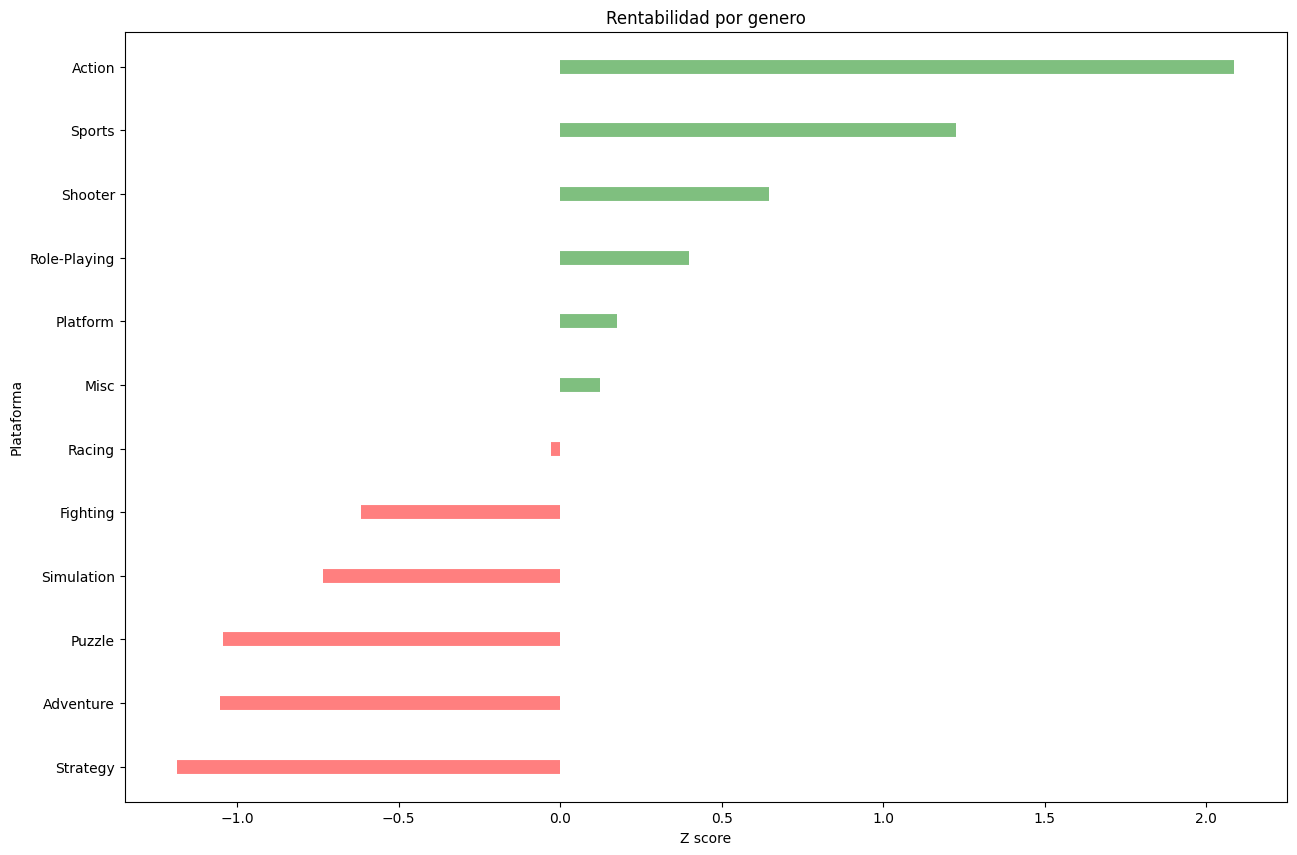

In [165]:
plt.figure(figsize=(15,10))
plt.hlines(
    y=sales_genre.genre,
    xmax=sales_genre.z_score,
    xmin=0,
    color=sales_genre.color,
    linewidth=10,
    alpha=0.5
)

plt.ylabel('Plataforma')
plt.xlabel('Z score')
plt.title('Rentabilidad por genero')

Los géneros más rentables son acción, deportes, shooter, role-playing y plataforma.

### Perfil de usuario de cada región

- ### Cinco principales plataformas por region

In [166]:
na_platform_sales = games.groupby('platform')['na_sales'].sum().sort_values().reset_index()

In [167]:
na_platform_sales.nlargest(5,['na_sales'])

,platform,na_sales
30,X360,602.47
29,PS2,583.84
28,Wii,496.90
27,PS3,393.49
26,DS,382.40


In [168]:
eu_platform_sales = games.groupby('platform')['eu_sales'].sum().sort_values().reset_index()

In [169]:
eu_platform_sales.nlargest(5,['eu_sales'])

,platform,eu_sales
30,PS2,339.29
29,PS3,330.29
28,X360,270.76
27,Wii,262.21
26,PS,213.61


In [170]:
jp_platform_sales = games.groupby('platform')['jp_sales'].sum().sort_values().reset_index()

In [171]:
jp_platform_sales.nlargest(5,['jp_sales'])

,platform,jp_sales
30,DS,175.57
29,PS,139.82
28,PS2,139.20
27,SNES,116.55
26,3DS,100.67


In [172]:
region_platform_sales = na_platform_sales.merge(eu_platform_sales, on='platform', how='inner')

In [173]:
region_platform_sales = region_platform_sales.merge(jp_platform_sales, on='platform', how='inner')

In [174]:
region_platform_sales = region_platform_sales.merge(sales_platform, on='platform', how='inner')

In [175]:
region_platform_sales = region_platform_sales.drop(columns = ['z_score','color'])

In [176]:
region_platform_sales['na_market_share'] = region_platform_sales['na_sales'] / region_platform_sales['total_sales']
region_platform_sales['eu_market_share'] = region_platform_sales['eu_sales'] / region_platform_sales['total_sales']
region_platform_sales['jp_market_share'] = region_platform_sales['jp_sales'] / region_platform_sales['total_sales']

In [177]:
region_platform_sales.sort_values('total_sales', ascending=False).head(5)

,platform,na_sales,eu_sales,jp_sales,total_sales,na_market_share,eu_market_share,jp_market_share
29,PS2,583.84,339.29,139.20,1255.77,0.464926,0.270185,0.110848
30,X360,602.47,270.76,12.43,971.42,0.620195,0.278726,0.012796
27,PS3,393.49,330.29,80.19,939.65,0.418762,0.351503,0.085340
28,Wii,496.90,262.21,69.33,907.51,0.547542,0.288933,0.076396
26,DS,382.40,188.89,175.57,806.12,0.474371,0.234320,0.217796


- ### Cinco principales generos por region

In [178]:
na_genre_sales = games.groupby('genre')['na_sales'].sum().sort_values().reset_index()

In [179]:
na_genre_sales.nlargest(5,['na_sales'])

,genre,na_sales
12,Action,879.01
11,Sports,684.43
10,Shooter,592.24
9,Platform,445.50
8,Misc,407.27


In [180]:
eu_genre_sales = games.groupby('genre')['eu_sales'].sum().sort_values().reset_index()

In [181]:
eu_genre_sales.nlargest(5,['eu_sales'])

,genre,eu_sales
12,Action,519.13
11,Sports,376.79
10,Shooter,317.34
9,Racing,236.51
8,Misc,212.74


In [182]:
jp_genre_sales = games.groupby('genre')['jp_sales'].sum().sort_values().reset_index()

In [183]:
jp_genre_sales.nlargest(5,['jp_sales'])

,genre,jp_sales
12,Role-Playing,355.41
11,Action,161.43
10,Sports,135.54
9,Platform,130.83
8,Misc,108.11


In [184]:
region_genre_sales = na_genre_sales.merge(eu_genre_sales, on='genre', how='inner')

In [185]:
region_genre_sales = region_genre_sales.merge(jp_genre_sales, on='genre', how='inner')

In [186]:
region_genre_sales['total_sales'] = region_genre_sales[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

In [187]:
region_genre_sales['na_market_share'] = region_genre_sales['na_sales'] / region_genre_sales['total_sales']
region_genre_sales['eu_market_share'] = region_genre_sales['eu_sales'] / region_genre_sales['total_sales']
region_genre_sales['jp_market_share'] = region_genre_sales['jp_sales'] / region_genre_sales['total_sales']

In [188]:
region_genre_sales.sort_values('total_sales', ascending=False).head(5)

,genre,na_sales,eu_sales,jp_sales,total_sales,na_market_share,eu_market_share,jp_market_share
12,Action,879.01,519.13,161.43,1559.57,0.563623,0.332867,0.103509
11,Sports,684.43,376.79,135.54,1196.76,0.571902,0.314842,0.113256
10,Shooter,592.24,317.34,38.76,948.34,0.624502,0.334627,0.040871
6,Role-Playing,330.81,188.71,355.41,874.93,0.378099,0.215686,0.406215
9,Platform,445.50,200.35,130.83,776.68,0.573595,0.257957,0.168448


- ### Ventas por clasificacion ESRB y region

In [189]:
na_rating_sales = games.groupby('rating')['na_sales'].sum().sort_values().reset_index()

In [190]:
na_rating_sales.sort_values(by='na_sales', ascending=False)

,rating,na_sales
7,E,1292.99
6,T,759.75
5,M,748.48
4,E10+,353.32
3,K-A,2.56
2,EC,1.53
1,AO,1.26
0,RP,0.00


In [191]:
eu_rating_sales = games.groupby('rating')['eu_sales'].sum().sort_values().reset_index()

In [192]:
eu_rating_sales.sort_values(by='eu_sales', ascending=False)

,rating,eu_sales
7,E,710.25
6,M,483.97
5,T,427.03
4,E10+,188.52
3,AO,0.61
2,K-A,0.27
1,EC,0.11
0,RP,0.08


In [193]:
jp_rating_sales = games.groupby('rating')['jp_sales'].sum().sort_values().reset_index()

In [194]:
jp_rating_sales.sort_values(by='jp_sales', ascending=False)

,rating,jp_sales
7,E,198.11
6,T,151.40
5,M,64.24
4,E10+,40.20
3,K-A,1.46
2,RP,0.00
0,AO,0.00
1,EC,0.00


### Prueba de hipotesis

### — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [195]:
scores = games[['platform', 'user_score']]

In [196]:
xone_scores = scores.query('platform == "XOne"')

In [197]:
xone_scores = xone_scores.dropna()

In [198]:
xone_scores = xone_scores.drop(columns=['platform'])

In [199]:
pc_scores = scores.query('platform == "PC"')

In [200]:
pc_scores = pc_scores.dropna()

In [201]:
pc_scores = pc_scores.drop(columns=['platform'])

In [202]:
### Prueba de Levine
###  H0: Los grupos tienen varianzas iguales.
### H1: Los grupos tienen varianzas diferentes.

xone_var = xone_scores.var()
#xone_var_2 = np.var(xone_scores, ddof=1)

pc_var = pc_scores.var()
#pc_var_2 = np.var(pc_scores, ddof=1)

results = st.levene(xone_scores, pc_scores)

#Nivel de confianza: 95%
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las varianzas son diferentes")
else:
    print("No se rechaza la hipotesis nula, las varianzas son iguales")

[0.26939515]
No se rechaza la hipotesis nula, las varianzas son iguales


In [203]:
### Prueba t de Student
###  H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
### H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

#Nivel de confianza: 95%
alpha = 0.05

results = st.ttest_ind(xone_scores, pc_scores)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las medias son diferentes")
else:
    print("No se rechaza la hipotesis nula, las medias son iguales")

[1.38964355e-05]
Se rechaza hipotesis nula, las medias son diferentes


### — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [204]:
genre_scores = games[['genre', 'user_score']]

In [205]:
action_scores = genre_scores.query('genre == "Action"')

In [206]:
action_scores = action_scores.dropna()

In [207]:
action_scores = action_scores.drop(columns=['genre'])

In [208]:
sports_scores = genre_scores.query('genre == "Sports"')

In [209]:
sports_scores = sports_scores.dropna()

In [210]:
sports_scores = sports_scores.drop(columns=['genre'])

In [211]:
### Prueba de Levine
###  H0: Los grupos tienen varianzas iguales.
### H1: Los grupos tienen varianzas diferentes.

action_var = action_scores.var()
#action_var_2 = np.var(action_scores, ddof=1)

sports_var = sports_scores.var()
#sports_var_2 = np.var(sports_scores, ddof=1)

results = st.levene(action_scores, sports_scores)

#Nivel de confianza: 95%
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las varianzas son diferentes")
else:
    print("No se rechaza la hipotesis nula, las varianzas son iguales")

[0.00017366]
Se rechaza hipotesis nula, las varianzas son diferentes


In [212]:
### Prueba t de Student
###  H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
### H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

#Nivel de confianza: 95%
alpha = 0.05

results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las medias son diferentes")
else:
    print("No se rechaza la hipotesis nula, las medias son iguales")

[0.11483819]
No se rechaza la hipotesis nula, las medias son iguales


### Conclusiones

El análisis de ventas de juegos ha permitido identificar patrones que influyen en el éxito comercial de los títulos en distintos mercados. A lo largo del estudio, se han revelado tendencias significativas relacionadas con la preferencia de plataformas, el impacto de la ubicación geográfica en la demanda y la correlación entre calificaciones de usuarios y rendimiento de ventas.
